<img src="http://epecora.com.br/DataFiles/PPGOLD_PPGMNE.png" alt="PPGOLD Data Science: INTRO" width="800">

## **Séries Temporais - PPGMNE:**  

#### LISTA 2

Programa de Pós-Graduação em Métodos Numéricos em Engenharia (PPGMNE)

Disciplina: Series Temporais
Prof.: ANSELMO CHACVES NETO

* 7.15) Dada a série temporal das vendas mensais de cerveja (série beersales), em milhões de barris, nos US no período de 01/1975 a 12/1990 pede-se:</br>
         a) O Gráfico da série temporal.</br>
         b) A série pode ser considerada sazonal? Por quê?</br>
         c) Fazendo o Gráfico do Periodograma Integrado, você diria que existe parte sistemática que pode ser modelada? Por quê?</br>
         d) Calcule as autocovariâncias e autocorrelações de lags 1, 2 e 3.</br>
         e) Calcule a média e a variância da série.</br>
         f) Faça os gráficos da FAC (autocorrelação) e da FACP (autocorrelação parcial).</br>
        g) Qual o nome dos limites no Gráfico do Periodograma Integrado?</br>
 
* 7.16) Uma série temporal é um processo estocástico? Por quê? Se sim de que tipo é o processo estocástico? Por quê?

* 7.17) Dada a série temporal do item 7.14, ou seja, </br>
| Zt | 12 14 16 14 18 20 19 22 24 23 | </br>
| t | 1  2   3   4   5   6   7   8   9  10 | </br>

 pede-se: 
  a) A série é estacionária na média? Por quê?
  b) Se a série não for estacionária na média é possível aplicar a Metodologia de Box & Jenkins direto? O que se deve fazer, então?




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from scipy.signal import periodogram
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [29]:
data = pd.read_csv(r'C:\Users\55489\Documents\GitHub\ts_ppgmne\Dados Beer Sales\dadosBeersales.csv')
data.sample(20)

,meses,barrels
41,42,15.8187
49,50,12.0133
103,104,17.3471
124,125,17.6043
11,12,11.5874
112,113,16.8656
1,2,9.8413
6,7,14.7534
169,170,13.1950
145,146,13.7362


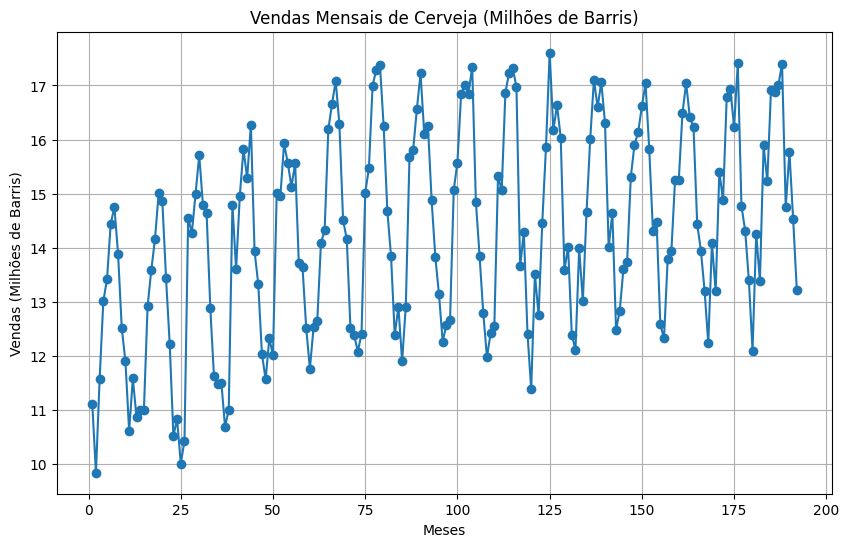

In [3]:
# a) Gráfico da série temporal
plt.figure(figsize=(10, 6))
plt.plot(data['meses'], data['barrels'], marker='o')
plt.title('Vendas Mensais de Cerveja (Milhões de Barris)')
plt.xlabel('Meses')
plt.ylabel('Vendas (Milhões de Barris)')
plt.grid(True)
plt.show()

b) A série pode ser considerada sazonal? Por quê?

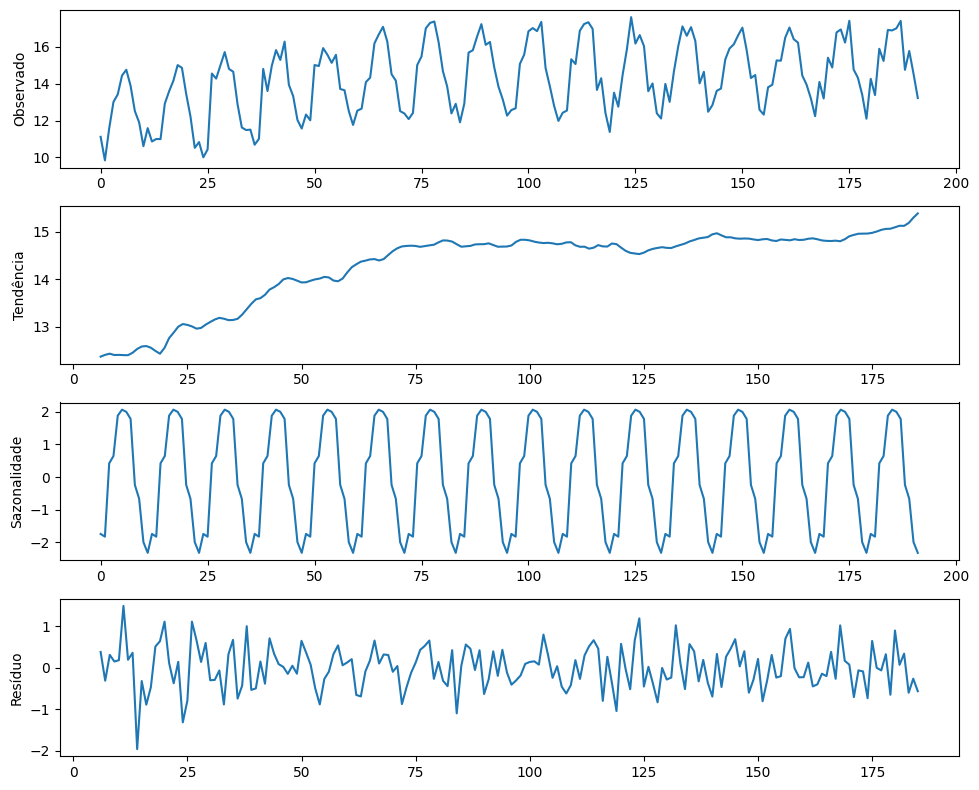

In [19]:
series = data['barrels'] 

decomposition = seasonal_decompose(series, model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Tendência')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Resíduo')
plt.tight_layout()
plt.show()


In [20]:
# teste estatistico para testar a sazonalidade da serie
data['Mes'] = (data['meses'] - 1) % 12 + 1  
data['Ano'] = (data['meses'] - 1) // 12 + 1  

series = data['barrels']

groups = [data[data['Mes'] == i]['barrels'] for i in range(1, 13)]

# Teste de Kruskal-Wallis (para comparar grupos independentes)
from scipy.stats import kruskal, friedmanchisquare
kruskal_stat, p_value_kruskal = kruskal(*groups)

print("Teste de Kruskal-Wallis:")
print(f"Estatística: {kruskal_stat}")
print(f"P-valor: {p_value_kruskal}")
if p_value_kruskal < 0.05:
    print("A série temporal apresenta sazonalidade significativa (Kruskal-Wallis).")
else:
    print("A série temporal NÃO apresenta sazonalidade significativa (Kruskal-Wallis).")

# Teste de Friedman (para comparar grupos dependentes)

friedman_stat, p_value_friedman = friedmanchisquare(*groups)

print("\nTeste de Friedman:")
print(f"Estatística: {friedman_stat}")
print(f"P-valor: {p_value_friedman}")
if p_value_friedman < 0.05:
    print("A série temporal apresenta sazonalidade significativa (Friedman).")
else:
    print("A série temporal NÃO apresenta sazonalidade significativa (Friedman).")

Teste de Kruskal-Wallis:
Estatística: 139.8961301813472
P-valor: 1.7100636540171923e-24
A série temporal apresenta sazonalidade significativa (Kruskal-Wallis).

Teste de Friedman:
Estatística: 159.39423076923083
P-valor: 1.7804213085542045e-28
A série temporal apresenta sazonalidade significativa (Friedman).


Foram realizados dois testes estatisticos afim de verificar a sazonaidade da série:

Teste de Kruskal-Wallis: A estatística obtida foi 139.90, com um p-valor extremamente baixo muito abaixo do nível de significância estabelecido por mim (0.5). Isso indica que há diferenças significativas entre as vendas mensais ao longo dos anos, sugerindo que o padrão de vendas varia de maneira recorrente, o que indicaria sazonalidade.

Teste de Friedman: A estatística foi 159.39, com um p-valor ainda menor, reforçando a conclusão de que as vendas variam significativamente entre os meses quando analisadas ao longo dos anos, levando a rejeicao da hipotese nula e aceitando a hipotese alternativa de que há sazonalidade na série temporal.</br>
</br>
Em ambos os testes os p-valores ficaram abaixo do estabelecido, o que leva a rejeiçao da hipotese nula de que as vendas sao semelhantes ou iguais. Portanto, nao podemos descartar a hipotese alternativa de que as vendas diferem significativamente entre os meses ao longo dos anos, que indicaria sazonalidade.

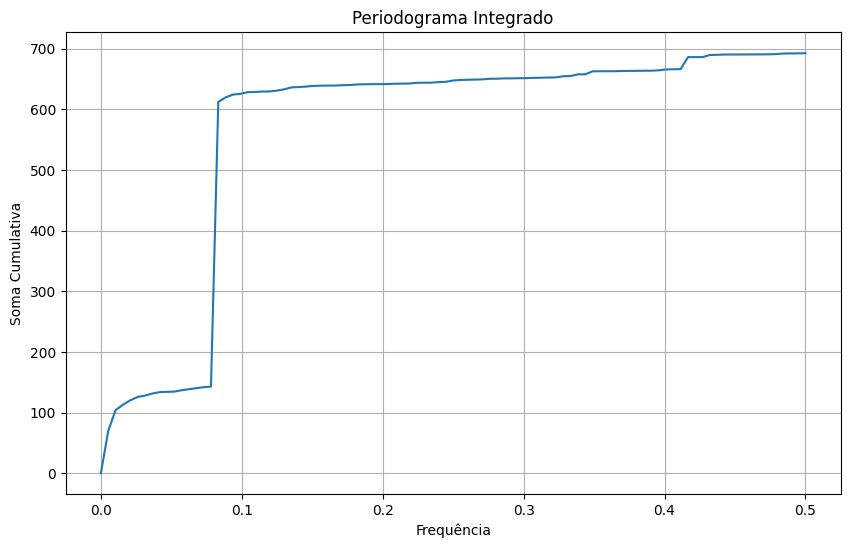

In [31]:
# c) Gráfico do Periodograma Integrado
frequencies, Pxx = periodogram(data['barrels'], fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.cumsum(Pxx))
plt.title('Periodograma Integrado')
plt.xlabel('Frequência')
plt.ylabel('Soma Cumulativa')
plt.grid(True)
plt.show()

In [23]:
# d) Autocovariâncias e Autocorrelações de lags 1, 2 e 3
autocorr = acf(data['barrels'], fft=False)
autocov = np.cov(data['barrels'], rowvar=False)

print("Autocorrelações para lag 1, 2 e 3:")
for i in range(1, 4):
    print(f"Lag {i}: {autocorr[i]}")

print("\nAutocovariâncias para lag 1, 2 e 3:")
for i in range(1, 4):
    print(f"Lag {i}: {autocorr[i] * np.var(data['barrels'])}")

Autocorrelações para lag 1, 2 e 3:
Lag 1: 0.7716530126813325
Lag 2: 0.5393301757557105
Lag 3: 0.18835200437195174

Autocovariâncias para lag 1, 2 e 3:
Lag 1: 2.783024728155483
Lag 2: 1.9451349131043134
Lag 3: 0.679305694593671


In [24]:
# e) Média e variância da série
media = np.mean(data['barrels'])
variancia = np.var(data['barrels'])

print(f"\nMédia da série: {media}")
print(f"Variância da série: {variancia}")


Média da série: 14.278977604166668
Variância da série: 3.60657534205051


<Figure size 1000x600 with 0 Axes>

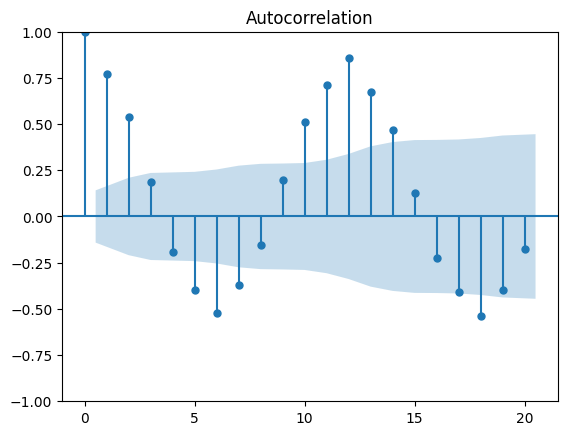

<Figure size 1000x600 with 0 Axes>

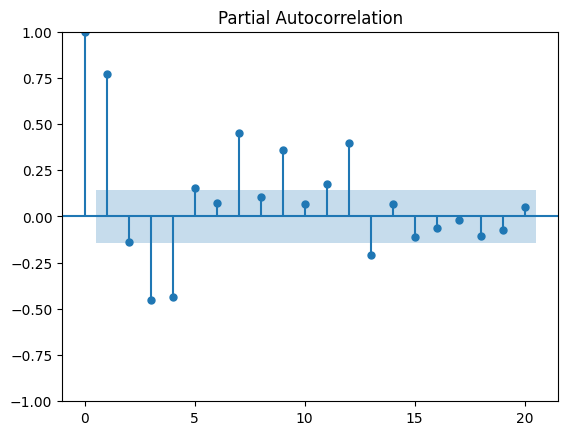


Os limites no Gráfico do Periodograma Integrado referem-se ao nívelde significância estatística, como uma indicação dos picos mais relevantes que podem ser modelados.


In [26]:
# f) Gráficos da FAC (autocorrelação) e FACP (autocorrelação parcial)
plt.figure(figsize=(10, 6))
plot_acf(data['barrels'], lags=20)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data['barrels'], lags=20)
plt.show()

# g) Limites no Gráfico do Periodograma Integrado
print("\nOs limites no Gráfico do Periodograma Integrado referem-se ao nível\
de significância estatística, como uma indicação dos picos mais relevantes que podem ser modelados.")

7.15) Uma série temporal é um processo estocástico?

Sim. Porque uma série temporal consiste em observações que variam ao longo do tempo de maneira incerta, sendo, portanto, modelada como um processo estocástico.</br>

De que tipo é o processo estocástico?

Pode ser de diferentes tipos, dependendo das características da série:</br>
Estacionário: Se a média, variância, e autocorrelação não mudam ao longo do tempo.</br>
Não Estacionário: Se há tendência, sazonalidade ou mudanças na variância ao longo do tempo.</br>
Autorregressivo (AR): Se as observações atuais dependem linearmente das passadas.</br>
Média Móvel (MA): Se as observações atuais dependem de uma média ponderada de erros passados.</br>
Integrado (I): Se a série se torna estacionária após diferenciação.

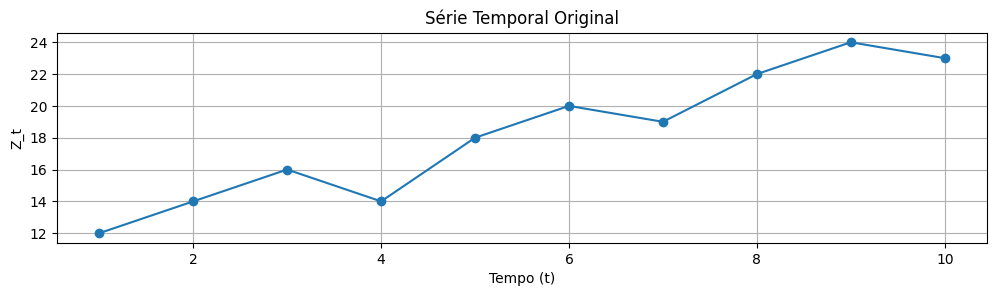

In [27]:
# Dados da serie
Z_t = np.array([12, 14, 16, 14, 18, 20, 19, 22, 24, 23])
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Diferenciacao da serie para remover a tendencia
dZ_t = np.diff(Z_t)

# serie original
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, Z_t, marker='o', linestyle='-')
plt.title('Série Temporal Original')
plt.xlabel('Tempo (t)')
plt.ylabel('Z_t')
plt.grid(True)

a) A série é estacionária na média? Por quê?</br>
Não. Para uma série ser estacionária na média, a média deve ser constante ao longo do tempo. Observando a série apresenta uma tendência de crescimento, especialmente nos valores posteriores (tendência crescente). Isso indica que a média da série não é constante, ou seja, a série não é estacionária na média. </br>
</br>
b) Se a série não for estacionária na média, é possível aplicar a Metodologia de Box & Jenkins direto? O que se deve fazer, então?
Não, não é possível aplicar diretamente.</br>
Para aplicar a Metodologia de Box & Jenkins, a série deve ser estacionária. Quando a série não é estacionária na média, como neste caso, é comum aplicar a diferenciação para remover a tendência e tornar a série estacionária. A diferenciação consiste em calcular a diferença entre valores consecutivos na série (
Após a diferenciação, se a série resultante for estacionária, pode-se então aplicar a Metodologia de Box & Jenkins.

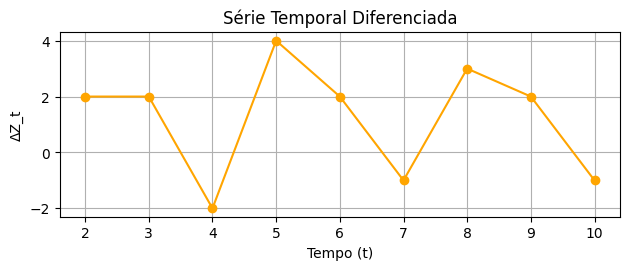

In [28]:
# serie diferenciada
plt.subplot(2, 1, 2)
plt.plot(t[1:], dZ_t, marker='o', linestyle='-', color='orange')
plt.title('Série Temporal Diferenciada')
plt.xlabel('Tempo (t)')
plt.ylabel('ΔZ_t')
plt.grid(True)

plt.tight_layout()
plt.show()